In [46]:
#1
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784',version=1,as_frame=False)

In [3]:
X,y=mnist["data"],mnist["target"]

In [4]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score
y_pred=knn_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9688

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={'weight':['distance','uniform'],'n_neighbors':[3,4,5]}

In [50]:
gridCV=GridSearchCV(knn_clf,param_grid=parameters,cv=3,verbose=3)


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  37.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  35.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  37.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  35.4s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  37.7s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  36.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.3s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  35.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  39.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
print('best parameters:', gridCV.best_params)
print('best score:', gridCV.best_score_)
print('best test score:', gridCV.score(X_test, y_test))

In [ ]:
knn_clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf2.fit(X_train, y_train)
accuracy_score(y_test, knn_clf2.predict(X_test))

In [23]:
#2
from scipy.ndimage.interpolation import shift



In [24]:
def shift_img(image, dx, dy):
    img = image.reshape( (28, 28) )
    shifted_img = shift(img, [dy, dx], cval=0, mode="constant")
    return shifted_img.reshape([-1])

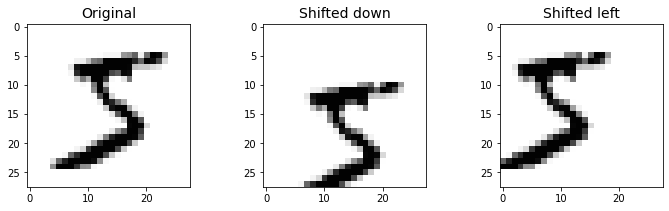

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

image = X.to_numpy()[0]

some_digit = X.to_numpy()[0] #오류처리!

shifted_image_down = shift_img(image, 0, 5)
shifted_image_left = shift_img(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [37]:
X_train_aug = [image for image in X_train]
y_train_aug = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train.values):
        X_train_aug.append(shift_img(image, dx, dy))
        y_train_aug.append(label)


In [39]:
import numpy as np

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
shuffle_idx = np.random.permutation(len(X_train_aug))
X_train_augmented = X_train_aug[shuffle_idx]
y_train_augmented = y_train_aug[shuffle_idx]

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)